In [1]:
name = "Gustavo David Quintero Alvarez"  # write YOUR NAME

honorPledge = "I affirm that I have not given or received any unauthorized\n"+\
              "help on this assignment, and that this work is my own.\n"


print("\nName: ", name)
print("\nHonor pledge: ", honorPledge)


Name:  Gustavo David Quintero Alvarez

Honor pledge:  I affirm that I have not given or received any unauthorized
help on this assignment, and that this work is my own.



# <font style="color:#FFFFFF;background-color:#2e4053;">MAC0460 / MAC5832 (2022)</font>
<hr>

## <font style="background-color:#abebc6">EP3: Logistic regression</font>

### Topics / concepts explored in this EP:

- Implementation of the **logistic regression algorithm**, using the gradient descent technique
- Application on binary classification of toy datasets
- Effects of parameters, unbalanced classes

### Evaluation  criteria
- Correctitude of the algorithms
- Code
    - do not change the prototype of the functions
    - efficiency (you should avoid unnecessary loops; use matrix/vector computation with NumPy wherever appropriate)
    - cleanliness (do not leave any commented code or useless variables)
- Appropriateness of the answers
- File format: Complete and submit this notebook <font color="red">with the outputs of the execution</font>. **Do no change the file name.**<br>Places to be filled are indicated with <font style="background-color: #f7dc6f">this color</font>

### Remarks
- In this notebook vectors are implemented as <tt>ndarray (n,)</tt> and not as <tt>ndarray (n,1)</tt>
- It might be wise to first make sure your implementation is correct. For instance, you can compare the results of your implementation with the ones obtained with the implementation available in <a href="https://scikit-learn.org/stable/">scikit-learn</a>.


# The algorithm

We will use the formulation described in the textbook (<i>Learning from data</i>, Abu-Mostafa <i>et al.</i>).<br> <u>Note</u>: Positive class label is equal to +1 and negative class label is equal to -1.

The loss (or cost) function to be minimized is
$$
E_{in}(\mathbf{w}) = \frac{1}{N} \sum_{i=1}^{N} \ln(1 + e^{-y^{(i)} \mathbf{w}^T \mathbf{x}^{(i)}}) \tag{1}
$$

Its gradient is given by

$$\nabla E_{in}(\mathbf{w}) = - \frac{1}{N}\sum_{i=1}^{N} \frac{y^{(i)} \mathbf{x}^{(i)}}{1 + e^{y^{(i)} \mathbf{w}^T \mathbf{x}^{(i)}}}  \tag{2}$$

The logistic (sigmoid) function is
$$\sigma(z) = \frac{1}{1 + e^{-z}}  \tag{3}$$

In [2]:
# All imports

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from sklearn.datasets import make_blobs

%matplotlib inline

# <font style="background-color:#abebc6">1. Training and prediction algorithms</font>

<br>
In the next four code cells, write the code to implement the specified functions. These functions should be used afterwards for some training and prediction cases. Use vectorial computation with NumPy.

## <font style="background-color: #f7dc6f">1.1. Cross-entropy loss</font>
This is Equation (1) above.

In [3]:
def cross_entropy_loss(w, X, y):
    """
    Computes the loss (equation 1)
    :param w: weight vector
    :type: np.ndarray(shape=(1+d, ))
    :param X: design matrix
    :type X: np.ndarray(shape=(N, 1+d))
    :param y: class labels
    :type y: np.ndarray(shape=(N, ))
    :return loss: loss (equation 1)
    :rtype: float
    """    
    
    ### ===> Your code begins here
    N = y.shape
    vector = np.log(1. + np.exp(-y * np.matmul(X,w)))
    Ein = np.sum(vector) / N
    
    return Ein
    ### ===> Your code ends here
    

## <font style="background-color: #f7dc6f">1.2. Gradient of the cross-entropy loss</font>

This is Equation (2) above.

In [4]:
def cross_entropy_gradient(w, X, y):
    """
    Computes the gradient of the loss function (equation 2)
    :param w: weight vector
    :type: np.ndarray(shape=(1+d, ))
    :param X: design matrix
    :type X: np.ndarray(shape=(N, 1+d))
    :param y: class labels
    :type y: np.ndarray(shape=(N, ))
    :return grad: gradient (equation 2)
    :rtype: float
    """
    
    ### ===> Your code begins here 
    N = y.shape
    vector = y / (1. + np.exp(y * np.matmul(X,w)))
    matrix = X * vector[:,np.newaxis]
    gradEin = -1.0 * np.sum(matrix,axis=0) / N
    
    return gradEin
    ### ===> Your code ends here


## <font style="background-color: #f7dc6f">1.3 Logistic regression training</font>

The function below receives the data matrix  <tt> X (shape = (N, d))</tt> and the ouput vector <tt>y (shape = (N,))</tt>, and should return the final weight vector <tt>w (shape = (d+1,))</tt> and, optionally (when  parameter <tt>return_history = True</tt>), a list of size <tt>num_iterations+1</tt> with the cross-entropy loss values at the beginning and after each of the iterations.

Note that the data matrix needs to be extended with a column of 1's.

If <tt>w0==None</tt>, then it must be initialized  with <tt>w0 = np.random.normal(loc = 0, scale = 1, size = X.shape[1])</tt>


In [5]:
def train_logistic(X, y, learning_rate = 1e-1, w0 = None,\
                        num_iterations = 300, return_history = False):
    """
    Computes the weight vector applying the gradient descent technique
    :param X: design matrix
    :type X: np.ndarray(shape=(N, d))
    :param y: class label
    :type y: np.ndarray(shape=(N, ))
    :return: weight vector
    :rtype: np.ndarray(shape=(1+d, ))
    :return: the history of loss values (optional)
    :rtype: list of float
    """    
     
    ### ===> Your code begins here
    N = X.shape[0]
    X = np.hstack((np.ones((N,1)),X))
    
    if (w0 == None):
        w0 = np.random.normal(loc = 0, scale = 1, size = X.shape[1])
    
    w = w0
    
    if return_history:
        Ein = cross_entropy_loss(w, X, y)
        history = [Ein]
    
    t = 0
    
    while (t < num_iterations):
        gradEin = cross_entropy_gradient(w, X, y)
        w = w - (learning_rate * gradEin)   
        
        if return_history:
            Ein = cross_entropy_loss(w, X, y)
            history.append(Ein)
            
        t += 1
        
    if return_history:
        return w,history
    else:
        return w
    
    
    
    
    ### ===> Your code ends here


## <font style="background-color: #f7dc6f">1.4. Logistic regression prediction</font>

The function in the next cell will be used to do the prediction. Recall that the prediction is a score in $[0,1]$, given by the sigmoid value of the linear combination.

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def predict_logistic(X, w):
    """
    Computes the logistic regression prediction
    :param X: design matrix
    :type X: np.ndarray(shape=(N,d))
    :param w: weight vector
    :rtype: np.ndarray(shape=(1+d,))
    :return: predicted classes 
    :rtype: np.ndarray(shape=(N,))
    """
    
    ### ===> Your code begins here
    N = X.shape[0]
    X = np.hstack((np.ones((N,1)),X))
    h = sigmoid(np.matmul(X,w))
    
    return h
    ### ===> Your code ends here


## <font style="background-color: #f7dc6f">1.4. Functions to plot the cross entropy per iteration and the decision boundary </font>

In [7]:
def plot_decision_boundary(y_pred):
    x1min = min(X[:,0])
    x1max = max(X[:,0])
    x2min = min(X[:,1])
    x2max = max(X[:,1])

    y_pred = predict_logistic(X, w_logistic)

    fig = plt.figure(figsize=(12,6))
    ax1 = fig.add_subplot(121)
    ax1.set_title("Ground-truth")

    # plot negatives in red
    ax1.scatter(X[y==-1,0], \
                X[y==-1,1], \
                alpha = 0.5, \
                c = 'red')

    # and positives in blue
    ax1.scatter(x=X[y==1,0], \
                y=X[y==1,1], \
                alpha = 0.5, \
                c = 'blue')

    ax2 = fig.add_subplot(122)

    ax2.set_title("Prediction")
    ax2.scatter(x = X[:,0], y = X[:,1], c = -y_pred, cmap = 'coolwarm')
    ax2.legend(handles=legend_elements, loc='best')
    ax2.set_xlim([x1min-1, x1max+1])
    ax2.set_ylim([x2min-1, x2max+1])

    p1 = (x1min, -(w_logistic[0] + (x1min)*w_logistic[1])/w_logistic[2])
    p2 = (x1max, -(w_logistic[0] + (x1max)*w_logistic[1])/w_logistic[2])

    lines = ax2.plot([p1[0], p2[0]], [p1[1], p2[1]], '-')
    plt.setp(lines, color='g', linewidth=4.0)

    plt.show()
    
def plot_cross_entropy(loss):
    plt.figure(figsize = (12, 8))
    plt.plot(loss)
    plt.xlabel('Iteration #')
    plt.ylabel('Cross Entropy Loss')
    plt.show()

# <font style="background-color:#abebc6">2. Testing the training and prediction algorithms on toy datasets</font>

## <font style="background-color:#abebc6">2.1. 2D data, separable case</font>

### 2.1.1. Generate two blobs of points

In [52]:
# Create two blobs
N = 300
X, y = make_blobs(n_samples=N, centers=2, cluster_std=1, n_features=2, random_state=2)

# change labels 0 to -1
y[y==0] = -1

print("X.shape =", X.shape, "  y.shape =", y.shape)

X.shape = (300, 2)   y.shape = (300,)


### 2.1.2. Let's plot the blobs of points

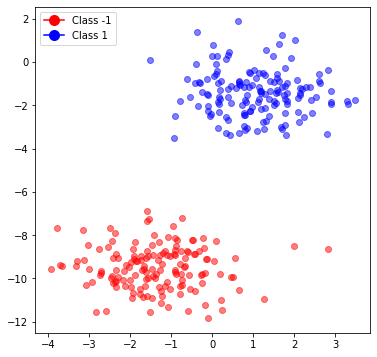

In [53]:
fig = plt.figure(figsize=(6,6))

# plot negatives in red
plt.scatter(X[y==-1,0], \
            X[y==-1,1], \
            alpha = 0.5,\
            c = 'red')

# and positives in blue
plt.scatter(x=X[y==1,0], \
            y=X[y==1,1], \
            alpha = 0.5, \
            c = 'blue')

P=+1
N=-1
legend_elements = [ Line2D([0], [0], marker='o', color='r',\
                    label='Class %d'%N, markerfacecolor='r',\
                    markersize=10),\
                    Line2D([0], [0], marker='o', color='b',\
                    label='Class %d'%P, markerfacecolor='b',\
                    markersize=10) ]

plt.legend(handles=legend_elements, loc='best')
plt.show()      


### <font style="background-color: #f7dc6f">2.1.3. Let's train the logistic regressor and plot the loss curve</font>


Final weight:
 [2.31067265 1.32517577 0.5809917 ]

Final loss:
 [0.06961851]


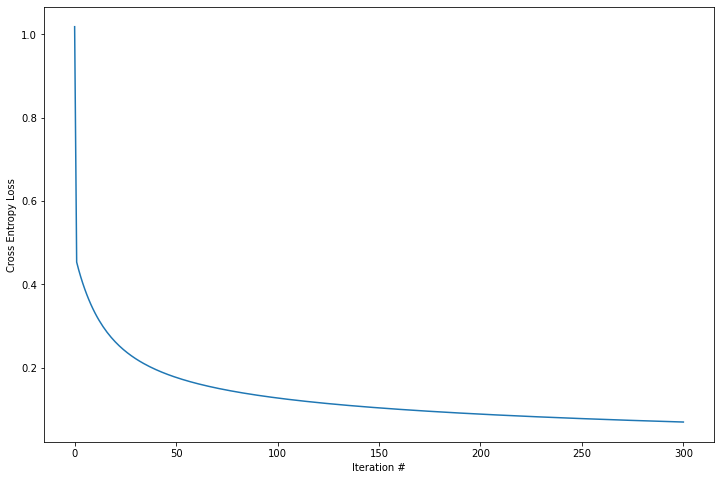

In [54]:
np.random.seed(567)

# ==> Replace the right hand side below with a call to the
# train_logistic() function defined above. Use parameter return_history=True

w_logistic, loss = train_logistic(X, y, learning_rate = 1e-1, w0 = None, num_iterations = 300, return_history = True)

# ==> Your code insert ends here

print()
print("Final weight:\n", w_logistic)
print()
print("Final loss:\n", loss[-1])

plot_cross_entropy(loss)

### 2.1.4. Now, let's plot the decision boundary

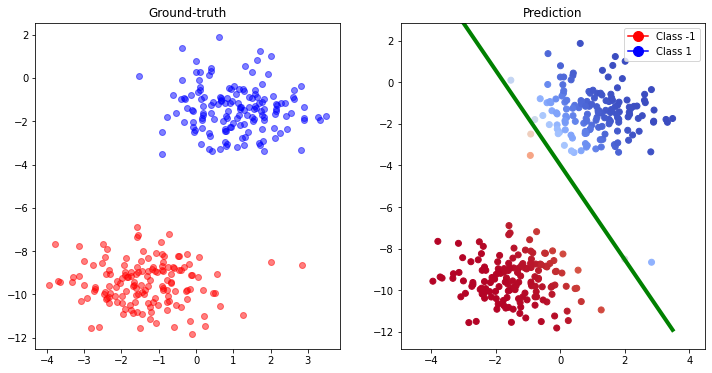

In [55]:
y_pred = predict_logistic(X, w_logistic)

plot_decision_boundary(y_pred)
        

### <font style="background-color: #f7dc6f">2.1.5.  Counting errors</font>

### <font style="background-color: #f7dc6f">2.1.6.  Convergence</font>

Try the above training with different number of iterations and learning rates. Comment how did you vary these parameters and what you have observed.

### Let us study the behavior of training for N = 500,1000,2000,5000,10000


Num. iterations:  300 

Final weight:
 [2.3154214  1.34967626 0.58290101]

Final loss:
 [0.06937138]

Cross entropy:


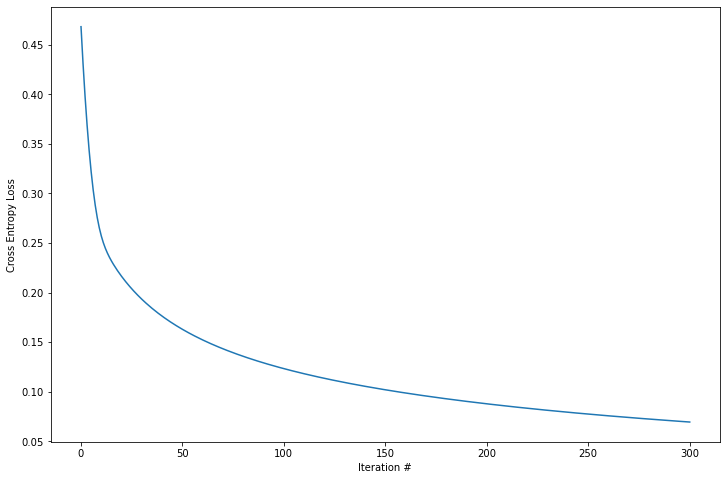


Decision boundary:


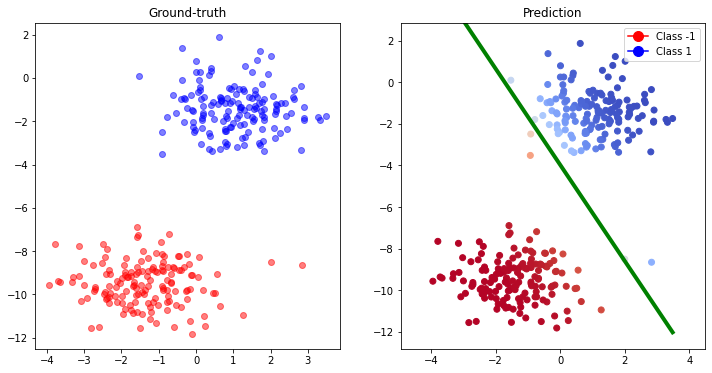


Num. iterations:  500 

Final weight:
 [2.84638756 1.54458382 0.68839751]

Final loss:
 [0.05251687]

Cross entropy:


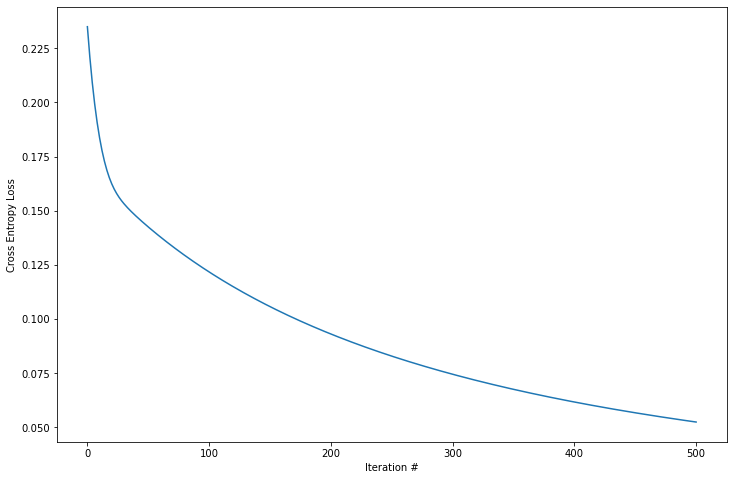


Decision boundary:


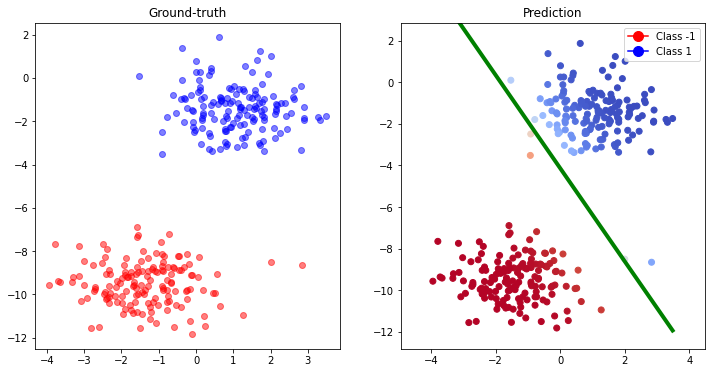


Num. iterations:  1000 

Final weight:
 [3.91162562 1.29261805 0.86422746]

Final loss:
 [0.02895276]

Cross entropy:


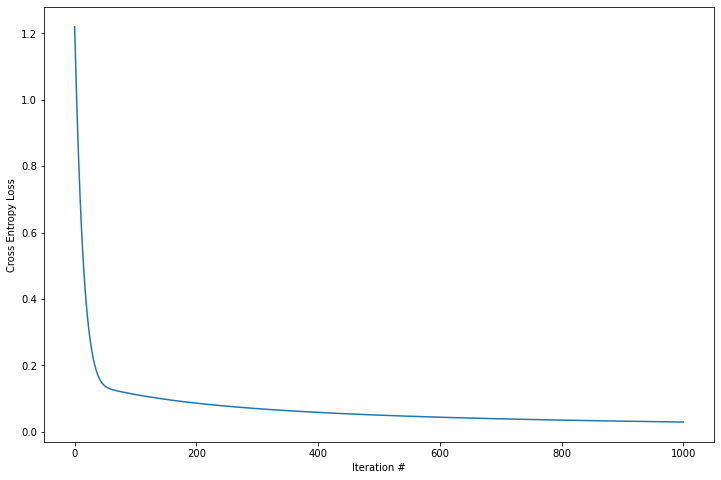


Decision boundary:


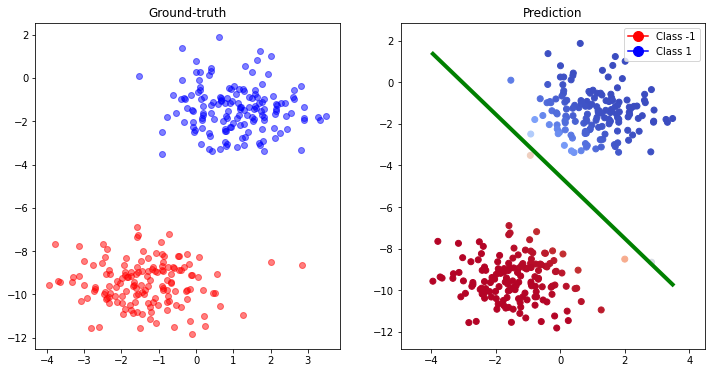


Num. iterations:  2000 

Final weight:
 [5.11559389 1.14405621 1.06616152]

Final loss:
 [0.01509872]

Cross entropy:


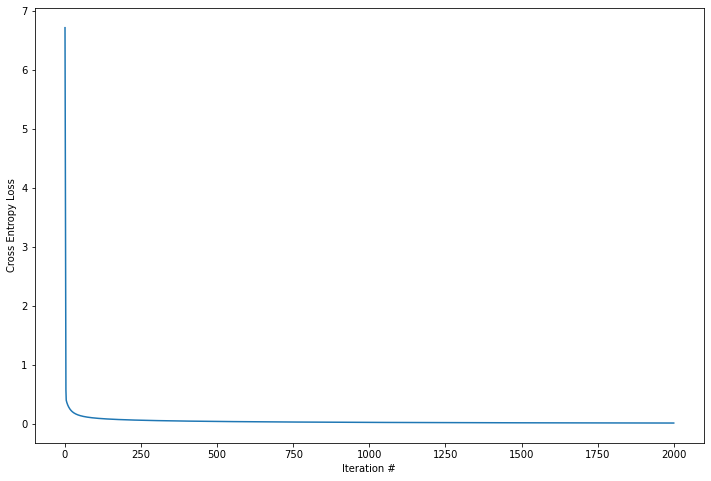


Decision boundary:


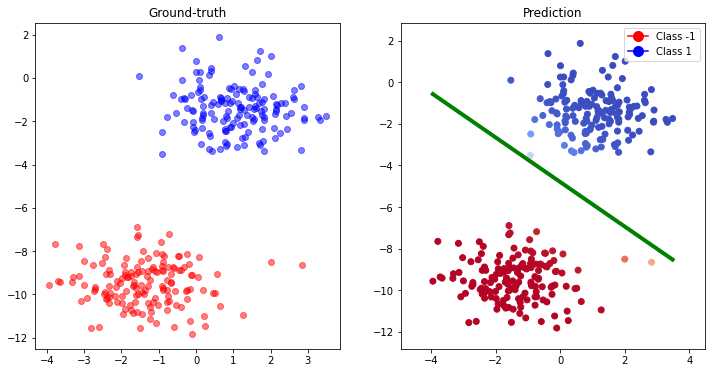


Num. iterations:  5000 

Final weight:
 [6.60147566 1.0622175  1.32003934]

Final loss:
 [0.00696962]

Cross entropy:


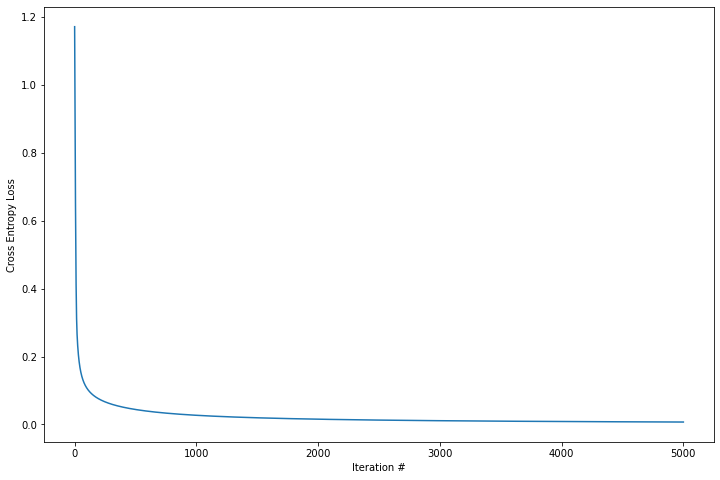


Decision boundary:


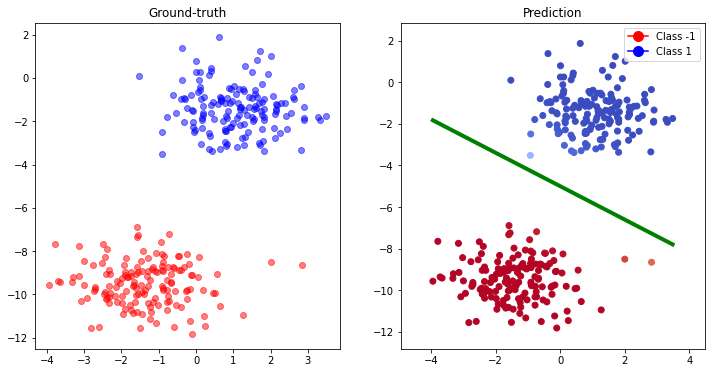


Num. iterations:  10000 

Final weight:
 [7.79050223 1.02536554 1.52500219]

Final loss:
 [0.00384441]

Cross entropy:


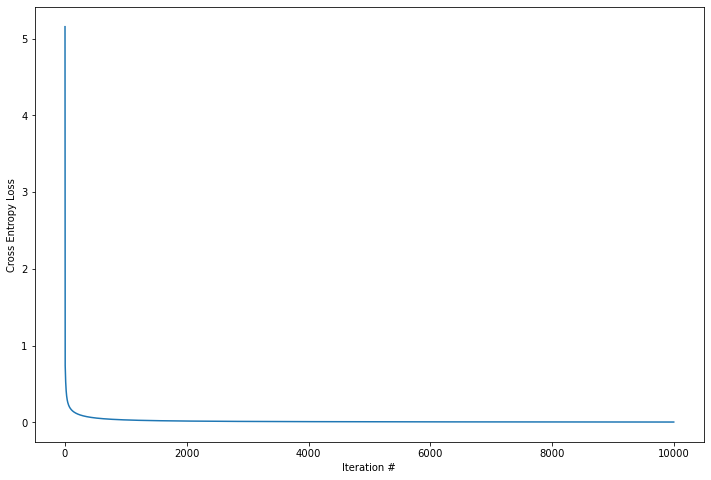


Decision boundary:


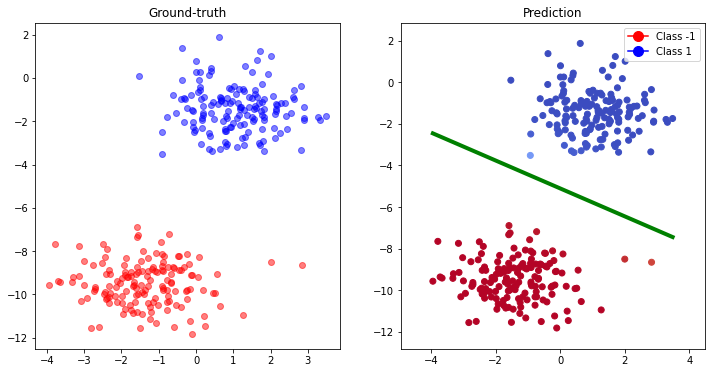

In [46]:
iterations = [300,500,1000,2000,5000,10000]

for k in iterations:
    w_logistic, loss = train_logistic(X, y, learning_rate = 1e-1, w0 = None, num_iterations = k, return_history = True)
    print()
    print("Num. iterations: ",k,"\n")
    print("Final weight:\n", w_logistic)
    print()
    print("Final loss:\n", loss[-1])
    print()
    print("Cross entropy:")
    plot_cross_entropy(loss)
    y_pred = predict_logistic(X, w_logistic)
    print()
    print("Decision boundary:")
    plot_decision_boundary(y_pred)

## <font style="background-color:#abebc6">2.2.  2D data, overlapping blobs</font>

<br>
<font style="background-color: #f7dc6f">Repeat 2.1, with overlapping blobs</font>

1. Generate the two classes of points (with cluster overlap) -- see documentation of function <tt>make_blobs()</tt>
2. Plot the points
3. Train the classifier and plot the loss curve
4. Plot the decision boundary
5. Compute the number of misclassified points

You may just copy and paste the cells of Section 2.1 and make appropriate changes

(Repeating codes is not recommended, but here we do not need to follow it strictly)

### 2.2.1. Generate two blobs of points with overlapping

In [47]:
# Creating two blobs
N = 500
X, y = make_blobs(n_samples=N, centers=2, cluster_std=2, n_features=2, random_state=2)

# change labels 0 to -1
y[y==0] = -1

print("X.shape =", X.shape, "  y.shape =", y.shape)

X.shape = (500, 2)   y.shape = (500,)


### 2.2.2. Let's plot the blobs of points

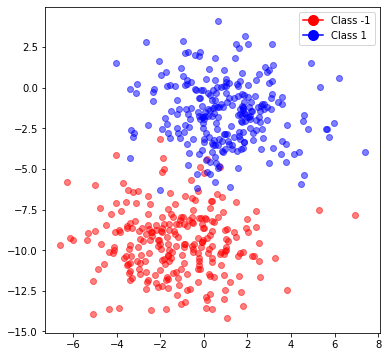

In [48]:
fig = plt.figure(figsize=(6,6))

# plot negatives in red
plt.scatter(X[y==-1,0], \
            X[y==-1,1], \
            alpha = 0.5,\
            c = 'red')

# and positives in blue
plt.scatter(x=X[y==1,0], \
            y=X[y==1,1], \
            alpha = 0.5, \
            c = 'blue')

P=+1
N=-1
legend_elements = [ Line2D([0], [0], marker='o', color='r',\
                    label='Class %d'%N, markerfacecolor='r',\
                    markersize=10),\
                    Line2D([0], [0], marker='o', color='b',\
                    label='Class %d'%P, markerfacecolor='b',\
                    markersize=10) ]

plt.legend(handles=legend_elements, loc='best')
plt.show() 

### 2.2.3 Let's train the logistic regressor and plot the loss curve


Final weight:
 [8.65293315 0.54956379 1.6188564 ]

Final loss:
 [0.05394217]


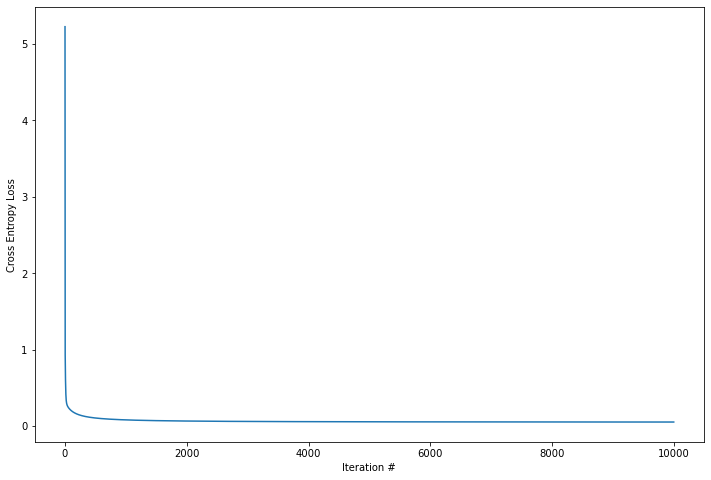

In [49]:
w_logistic, loss = train_logistic(X, y, learning_rate = 1e-1, w0 = None, num_iterations = 10000, return_history = True)

# ==> Your code insert ends here

print()
print("Final weight:\n", w_logistic)
print()
print("Final loss:\n", loss[-1])

plot_cross_entropy(loss)

### 2.1.4. Now, let's plot the decision boundary

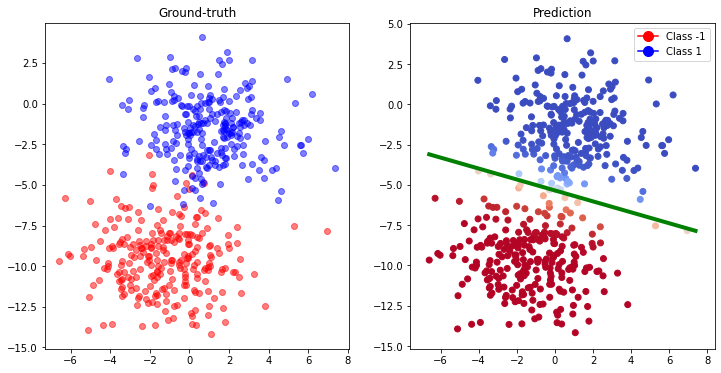

In [51]:
y_pred = predict_logistic(X, w_logistic)

plot_decision_boundary(y_pred)

## <font style="background-color:#abebc6">2.3. 2D data with overlapping and unbalanced classes</font>

<br>
<font style="background-color: #f7dc6f">Repeat 2.2 for unbalanced classes</font>

Repeat the last case (Section 2.2), but now considering a unbalanced class distribution.
You may try 80% x 20%, for instance.

In [58]:
N = 300
X, y = make_blobs(n_samples=[int(N*0.8),int(N*0.2)], centers=np.array([[3,3],[0,0]]), cluster_std=1, n_features=2, random_state=2)

# change labels 0 to -1
y[y==0] = -1

print("X.shape =", X.shape, "  y.shape =", y.shape)

X.shape = (300, 2)   y.shape = (300,)


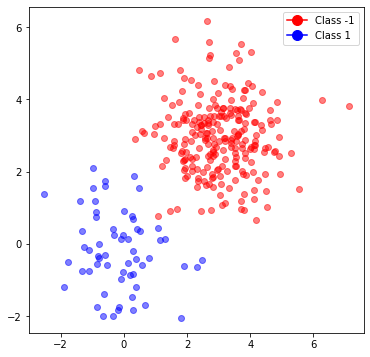

In [59]:
fig = plt.figure(figsize=(6,6))

# plot negatives in red
plt.scatter(X[y==-1,0], \
            X[y==-1,1], \
            alpha = 0.5,\
            c = 'red')

# and positives in blue
plt.scatter(x=X[y==1,0], \
            y=X[y==1,1], \
            alpha = 0.5, \
            c = 'blue')

P=+1
N=-1
legend_elements = [ Line2D([0], [0], marker='o', color='r',\
                    label='Class %d'%N, markerfacecolor='r',\
                    markersize=10),\
                    Line2D([0], [0], marker='o', color='b',\
                    label='Class %d'%P, markerfacecolor='b',\
                    markersize=10) ]

plt.legend(handles=legend_elements, loc='best')


Final weight:
 [ 6.09197862 -2.74252188 -2.79877073]

Final loss:
 [0.01657947]


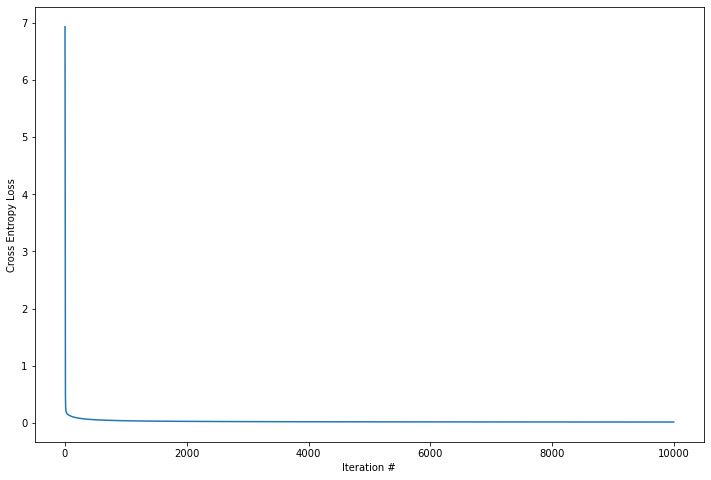

In [62]:
w_logistic, loss = train_logistic(X, y, learning_rate = 1e-1, w0 = None, num_iterations = 10000, return_history = True)

# ==> Your code insert ends here

print()
print("Final weight:\n", w_logistic)
print()
print("Final loss:\n", loss[-1])

plot_cross_entropy(loss)

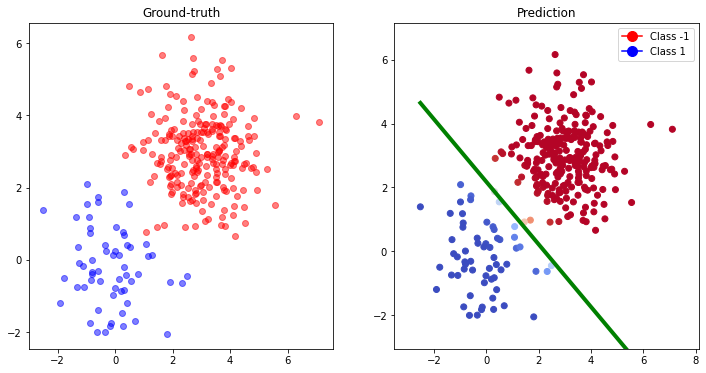

In [63]:
y_pred = predict_logistic(X, w_logistic)

plot_decision_boundary(y_pred)
        

## <font style="background-color:#abebc6">2.4. 3D+ data</font>

This section is to make sure your implementation works for data points with dimension $d>2$.

<font style="background-color: #f7dc6f">Write code for blobs that are sufficiently separated and with dimension $d$ at least 3. Compute the number of misclassified points at the end.</font>

You may try larger dimension and also overlapping blobs.

In this sestion, there is no need to plot the blob of points nor the decision boundary (3D plot may be misleading and we are not able to plot data of larger dimension anyway ...)